# Assignment - Decision Trees

1) Using the data sets you use in the second project, the regression project and the third project, the classification project, create regression and classification models with decision trees and determine the most appropriate parameter values for these models. You can use the cross-validation methods you learned in the previous section to find the ideal parameter.

## 1.1. Classification with Decision Tree

In [1]:
import pandas as pd
import numpy as np
import sklearn.tree as tree
import scipy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df_heart_attack = pd.read_csv('risk_of_heart_attack2.csv')
df_heart_attack.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
X=df_heart_attack.drop('num',axis=1)
y=df_heart_attack['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)

decision_tree = DecisionTreeClassifier(random_state = 111)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print("Decision Tree Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))

Decision Tree Accuracy: 0.8889


In [4]:
from sklearn.model_selection import GridSearchCV

parameters = {"criterion":['gini', 'entropy'],
              "splitter":['best', 'random'],
              "max_depth": [2, 3, 4, 5],
              "min_samples_split": [2, 3, 4]
             }

grid_cv = GridSearchCV(estimator=decision_tree, param_grid=parameters, cv=5)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=111),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']})

In [5]:
df = pd.DataFrame(grid_cv.cv_results_)
df = df[['param_criterion','param_splitter','param_max_depth', 'param_min_samples_split','mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df.head(10)

,param_criterion,param_splitter,param_max_depth,param_min_samples_split,mean_test_score
6,gini,best,3,2,0.943350
36,entropy,best,4,2,0.936207
12,gini,best,4,2,0.936207
10,gini,best,3,4,0.929064
8,gini,best,3,3,0.929064
42,entropy,best,5,2,0.929064
17,gini,random,4,4,0.929064
44,entropy,best,5,3,0.929064
18,gini,best,5,2,0.929064
13,gini,random,4,2,0.929064


In [6]:
print("Best parameters for our model:\n",grid_cv.best_params_)

Best parameters for our model:
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'best'}


## 1.2. Regression with Decision Tree

In [7]:
df_house_prices = pd.read_csv('house_prices2.csv')
df_house_prices.head()

,SalePrice,BsmtQual,PoolQC,YearBuilt,OverallQual,GrLivArea,GarageCars
0,208500,3,0,2003,7,1710,2
1,181500,3,0,1976,6,1262,2
2,223500,3,0,2001,7,1786,2
3,140000,2,0,1915,7,1717,3
4,250000,3,0,2000,8,2198,3


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [9]:
X = df_house_prices.drop('SalePrice', axis=1)
y = df_house_prices['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

dt_reg = DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)
dt_mae = mae(y_pred, y_test)
dt_mse = mse(y_pred, y_test)
dt_rmse = dt_mse**(1/2)

print("Decision Tree MAE: {:.3f}".format(dt_mae))
print("Decision Tree MSE: {:.3f}".format(dt_mse))
print("Decision Tree RMSE: {:.3f}".format(dt_rmse))

Decision Tree MAE: 30467.928
Decision Tree MSE: 2416997563.825
Decision Tree RMSE: 49162.969


In [10]:
from sklearn.model_selection import GridSearchCV

parameters = {"criterion":['mse', 'friedman_mse', 'mae', 'poisson'],
              "splitter":['best', 'random'],
              "max_depth": [4, 5, 6, 7],
              "min_samples_split": [2, 3, 4, 5]
             }

grid_cv = GridSearchCV(estimator=dt_reg, param_grid=parameters, cv=5)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=3),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [11]:
df = pd.DataFrame(grid_cv.cv_results_)
df = df[['param_criterion','param_splitter','param_max_depth', 'param_min_samples_split', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df.head(10)

,param_criterion,param_splitter,param_max_depth,param_min_samples_split,mean_test_score
80,mae,best,6,2,0.753722
22,mse,best,6,5,0.748443
52,friedman_mse,best,6,4,0.748420
54,friedman_mse,best,6,5,0.747925
76,mae,best,5,4,0.747906
18,mse,best,6,3,0.747337
20,mse,best,6,4,0.746984
78,mae,best,5,5,0.746274
48,friedman_mse,best,6,2,0.746250
74,mae,best,5,3,0.745695


In [12]:
print("Best parameters for our model:\n",grid_cv.best_params_)

Best parameters for our model:
 {'criterion': 'mae', 'max_depth': 6, 'min_samples_split': 2, 'splitter': 'best'}


2) Using below given table answer questions a and b.

<b>(a)</b> Using the dataset above, we want to build a decision tree which classifies Y as T/F given the binary variables A,B,C. Draw the tree that would be learned by the greedy algorithm with zero training error. You do not need to show any computation.

In [13]:
import pandas as pd
label_dict = {'A': ['F','T','T','T'],
              'B': ['F','F','T','T'],
              'C': ['F','T','F','T'],
              'Y':['F','T','T','F']}

df_dict = pd.DataFrame(label_dict)
df_dict

,A,B,C,Y
0,F,F,F,F
1,T,F,T,T
2,T,T,F,T
3,T,T,T,F


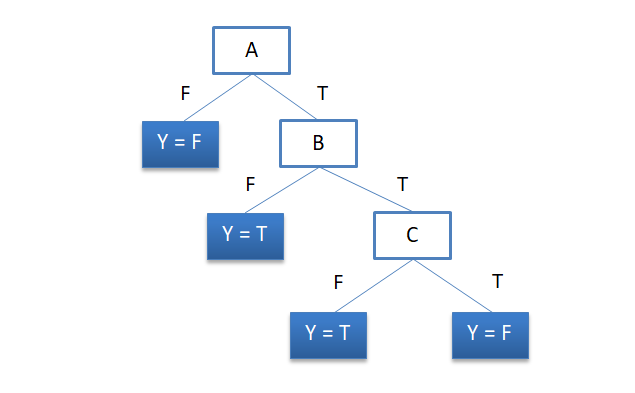

<b>(b)</b> Is this tree optimal (i.e. does it get zero training error with minimal depth)? Explain in less than two sentences. If it is not optimal, draw the optimal tree as well.

No, that tree is not optimal. We can build a tree of depth 2 which classifies correctly and is optimal.

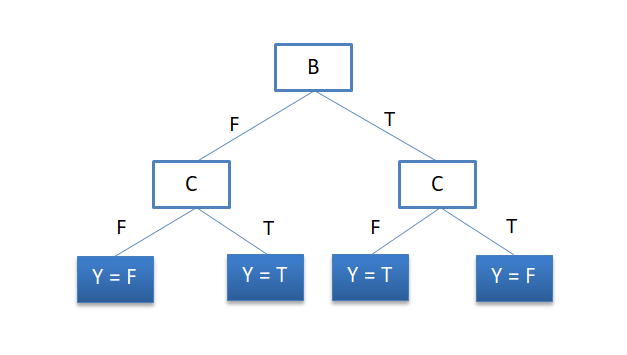

3) We will use the dataset below to learn a decision tree which predicts if people pass machine learning (Yes or No), based on their previous GPA (High, Medium, or Low) and whether or not they studied.

In [14]:
dec_tree = {'GPA': ['L','L','M','M','H','H'],
            'Studied': ['F','T','F','T','F','T'],
            'Passed': ['F','T','F','T','T','T']}
df_dec_tree = pd.DataFrame(dec_tree)
df_dec_tree

,GPA,Studied,Passed
0,L,F,F
1,L,T,T
2,M,F,F
3,M,T,T
4,H,F,T
5,H,T,T


<b>(a)</b> What is the entropy H(Passed)?

$$H(Passed) = -(\frac{2}{6}\log_{2}\frac{2}{6}+\frac{4}{6}\log_{2}\frac{4}{6})$$
$$H(Passed) = -(\frac{1}{3}\log_{2}\frac{1}{3}+\frac{2}{3}\log_{2}\frac{2}{3})$$

In [15]:
import math
result = -(1/3*(math.log2(1/3)) + 2/3*(math.log2(2/3)))
print("The entropy of H(Passed): {:.2f}".format(result))

The entropy of H(Passed): 0.92


<b>(b)</b> What is the entropy H(Passed | GPA)?

$$H(Passed|GPA)  = -\frac{1}{3}(\frac{1}{2}\log_{2}\frac{1}{2}+\frac{1}{2}\log_{2}\frac{1}{2})-\frac{1}{3}(\frac{1}{2}\log_{2}\frac{1}{2}+\frac{1}{2}\log_{2}\frac{1}{2})-\frac{1}{3}(1\log_{2}1)$$
$$H(Passed|GPA) = \frac{1}{3}(1)+\frac{1}{3}(1)+\frac{1}{3}(0)$$
$$H(Passed|GPA) = \frac{2}{3} \approx 0.66$$

<b>(c)</b> What is the entropy H(Passed | Studied)?

In [16]:
result = -1/2*(1/3*(math.log2(1/3)) + 2/3*(math.log2(2/3)))
print("The entropy of H(Passed|Studied): {:.2f}".format(result))

The entropy of H(Passed|Studied): 0.46


<b>(4)</b> How to prevent overfitting in decision tree?

The decision tree is prone to overfitting in the process of growing, resulting in low generalization ability. There are two main methods that can be used to prevent overfitting.
  1) Pre-pruning: that stops growing the tree earlier, before it perfectly classifies the training set.
  
  2) Post-pruning: that allows the tree to perfectly classify the training set, and then post prune the tree. 